#Data Mining

Alumna: Angie Vargas Matarrita

Profesora: Gabriela Espinoza Picado


Universidad Cenfotec


1: Identificación del Tema de Investigación:

Depresión y salud mental



2: Búsqueda de Bases de Datos

https://www.kaggle.com/datasets/shashwatwork/depression-and-mental-health-data-analysis


 3: Aplicación de Estructuras de Datos y Exploración de Datos (EDA)



4: Definición del Problema de Investigación



*   ¿Cuales son los factores que pueden afectar a la población e influir en el desarrollo de enfermedades mentales y depresión?
*   ¿Cómo podemos a travez de las diversas variables detectar el rango etáreo y género que están en mayor riesgo?

El objetivo de este análisis es encontrar a travéz de los datos quienes, a que edad y cuales factores pueden influir en el desarrollo de enfermedades mentales y depresión, tomando en cuenta si la persona ha sufrido estrés creciente, frustración por la cuarentena que enfrentó la humanidad, la cantidad de tiempo que pasa encerrado/a en casa, si esto ha afectado su peso y hábitos, entre otros.
Es un estudio muy útil e interesante que puede arrojar conclusiones que ayuden a la mejora en la vida de las personas



Librerias que utilizaré:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score

In [4]:
#Con este código obtengo el Dataset seleccionado y puedo empezar a trabajar
path="/content/mental_health_finaldata_1.csv"
data = pd.read_csv(path)
data.head().all()

Age                        True
Gender                     True
Occupation                 True
Days_Indoors               True
Growing_Stress             True
Quarantine_Frustrations    True
Changes_Habits             True
Mental_Health_History      True
Weight_Change              True
Mood_Swings                True
Coping_Struggles           True
Work_Interest              True
Social_Weakness            True
dtype: bool

¿Cuántas filas y columnas tiene el Dataset?

In [5]:
# Obtener el número de filas y columnas
num_filas = data.shape[0]
num_columnas = data.shape[1]

# Imprimir el número de filas y columnas
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

Número de filas: 824
Número de columnas: 13


Valores unicos en columnas determinantes

In [6]:
#Codigo para ver los valores unicos de la columna edad
data['Age'].unique()


array(['20-25', '30-Above', '25-30', '16-20'], dtype=object)

In [32]:
#Codigo para ver los valores unicos de la columna Ocupation
data['Occupation'].unique()

array(['Corporate', 'Others', 'Student', 'Housewife', 'Business'],
      dtype=object)

In [33]:
#Codigo para ver los valores unicos de la columna Frustracion en la cuarentena
data['Quarantine_Frustrations'].unique()

array(['Yes', 'No', 'Maybe'], dtype=object)

¿Qué datos contiene las primeras  5 filas?

In [11]:
# Mostrar las primeras 5 filas
print(data.head(6))

data

        Age  Gender Occupation        Days_Indoors Growing_Stress  \
0     20-25  Female  Corporate           1-14 days            Yes   
1  30-Above    Male     Others          31-60 days            Yes   
2  30-Above  Female    Student    Go out Every day             No   
3     25-30    Male     Others           1-14 days            Yes   
4     16-20  Female    Student  More than 2 months            Yes   
5     25-30    Male  Housewife  More than 2 months             No   

  Quarantine_Frustrations Changes_Habits Mental_Health_History Weight_Change  \
0                     Yes             No                   Yes           Yes   
1                     Yes          Maybe                    No            No   
2                      No            Yes                    No            No   
3                      No          Maybe                    No         Maybe   
4                     Yes            Yes                    No           Yes   
5                     Yes           

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
0,20-25,Female,Corporate,1-14 days,Yes,Yes,No,Yes,Yes,Medium,No,No,Yes
1,30-Above,Male,Others,31-60 days,Yes,Yes,Maybe,No,No,High,No,No,Yes
2,30-Above,Female,Student,Go out Every day,No,No,Yes,No,No,Medium,Yes,Maybe,No
3,25-30,Male,Others,1-14 days,Yes,No,Maybe,No,Maybe,Medium,No,Maybe,Yes
4,16-20,Female,Student,More than 2 months,Yes,Yes,Yes,No,Yes,Medium,Yes,Maybe,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,20-25,Male,Corporate,Go out Every day,No,Yes,No,Yes,Yes,Medium,No,Yes,Maybe
820,20-25,Male,Others,1-14 days,Yes,Yes,No,Yes,Maybe,Low,No,Maybe,Maybe
821,20-25,Male,Student,More than 2 months,Yes,Maybe,Maybe,No,Yes,High,Yes,Yes,Maybe
822,16-20,Male,Business,15-30 days,No,No,Maybe,No,Maybe,Low,Yes,No,Maybe


Análisis de valores nulos o vacios

In [12]:
df = pd.DataFrame(data)

# Identificar columnas con valores faltantes y contar la cantidad de valores faltantes en cada una
valores_faltantes = df.isnull().sum()

# Mostrar los resultados
print("Columnas con valores faltantes y cantidad de valores faltantes:")
print(valores_faltantes)

Columnas con valores faltantes y cantidad de valores faltantes:
Age                        0
Gender                     0
Occupation                 0
Days_Indoors               0
Growing_Stress             0
Quarantine_Frustrations    0
Changes_Habits             0
Mental_Health_History      0
Weight_Change              0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
dtype: int64


In [13]:
# Estadísticas descriptivas
print(df.describe())

             Age  Gender Occupation Days_Indoors Growing_Stress  \
count        824     824        824          824            824   
unique         4       2          5            5              3   
top     30-Above  Female  Housewife   31-60 days            Yes   
freq         222     434        185          171            301   

       Quarantine_Frustrations Changes_Habits Mental_Health_History  \
count                      824            824                   824   
unique                       3              3                     3   
top                        Yes            Yes                    No   
freq                       304            305                   284   

       Weight_Change Mood_Swings Coping_Struggles Work_Interest  \
count            824         824              824           824   
unique             3           3                2             3   
top            Maybe      Medium               No            No   
freq             281         280        

#**Gráficos**

#Distribución de Edades (Orden por Frecuencia Ascendente)


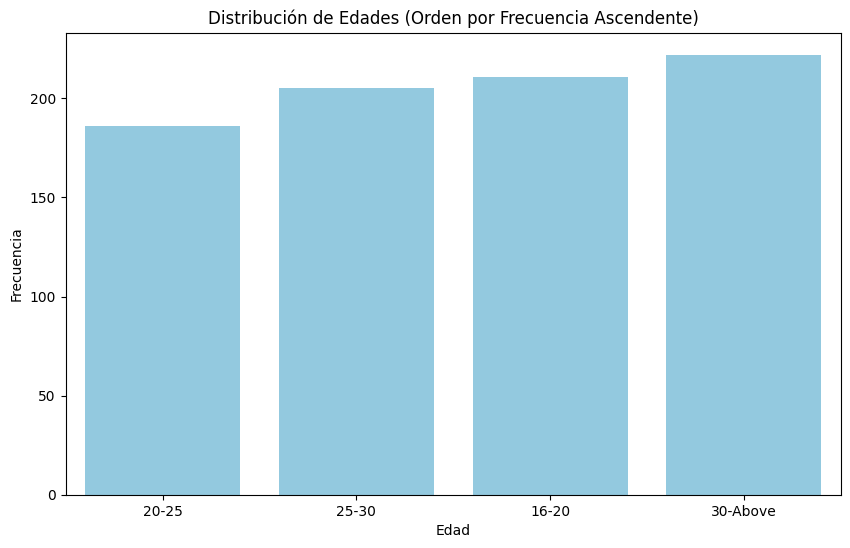

In [28]:
# Obtener las frecuencias de cada edad y ordenar el DataFrame por frecuencia ascendente
df_sorted_frequency = df['Age'].value_counts().reset_index().rename(columns={'index': 'Age', 'Age': 'Frequency'}).sort_values(by='Frequency')

# Gráfico de la distribución de edades ordenado por frecuencia ascendente
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Frequency', data=df_sorted_frequency, color='skyblue')
plt.title('Distribución de Edades (Orden por Frecuencia Ascendente)')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

Este gráfico nos brinda una visión de la distribución de edades en nuestro conjunto de datos, ordenado por la frecuencia de cada edad de manera ascendente.
Eje X (Horizontal):

*   Eje Y (Vertical):En el lado izquierdo del gráfico, representamos la frecuencia de cada edad. Cuanto más alto es un punto en la barra, mayor es la frecuencia de esa edad.
*   Elemento de lista

Este gráfico es útil para visualizar la variabilidad de edades en tu conjunto de datos y resaltar las edades que son más comunes en la muestra.

#Distribución Porcentual de Género de la población entrevistada

In [1]:
# Gráfico circular (pastel) para mostrar la distribución de género
plt.figure(figsize=(8, 8))

# Conteo de ocurrencias de cada género
gender_counts = df['Gender'].value_counts()

# Graficar el gráfico circular
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=sns.color_palette('coolwarm'))

plt.title('Distribución de Género')
plt.show()

NameError: name 'plt' is not defined

Este gráfico circular nos proporciona una representación visual de la distribución de género en nuestro conjunto de datos.


*   División del Círculo: El círculo se divide en sectores, cada uno representando un género diferente
*  Colores de los Sectores: Cada sector tiene un color único. En este caso, el celeste oscuro representa el genero femenino y el claro al masculino


*   Etiquetas y Porcentajes:Cada sector está etiquetado con el género correspondiente, y en el interior del sector, se muestra el porcentaje de ocurrencias de ese género en relación con el total.
*  Tamaño del Círculo: El tamaño total del círculo refleja la proporción relativa de cada género en nuestro conjunto de datos


Al observar este gráfico, se puede identificar fácilmente la proporción de cada género en el conjunto de datos y comprender visualmente cómo se distribuyen.

#Distribución de Días que pasaron los entrevistados en Interiores

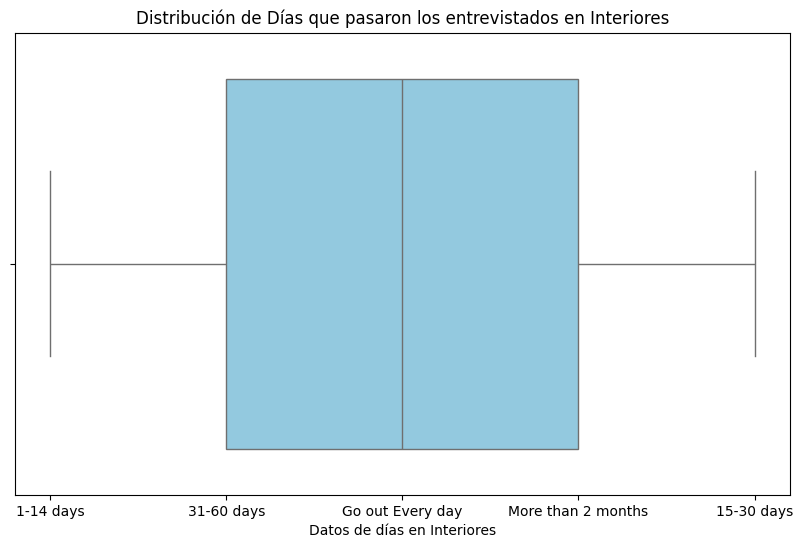

In [60]:
# Boxplot para visualizar la distribución de Días en Interiores
plt.figure(figsize=(10, 6))
sns.boxplot(x='Days_Indoors', data=df, color='skyblue')
plt.title('Distribución de Días que pasaron los entrevistados en Interiores')
plt.xlabel('Datos de días en Interiores')
plt.show()

Este boxplot nos proporciona una representación visual de la distribución de la cantidad de días que las personas encuestadas pasaron en interiores.
Elementos del Boxplot:
El boxplot consta de una caja y, posiblemente, de líneas o 'bigotes' que se extienden desde la caja. Cada parte del boxplot nos da información sobre la distribución de los datos.

Caja Central:

La caja representa el rango intercuartil (IQR), que indica dónde se encuentra el 50% central de los datos. La altura de la caja muestra la variabilidad en este rango.
Línea en la Caja:
La línea dentro de la caja indica la mediana, que es el valor que divide los datos en dos mitades iguales.
Bigotes:Los 'bigotes' se extienden desde la caja hasta los valores extremos. Pueden ayudar a identificar la dispersión de los datos.
Outliers (valores atípicos):Cualquier punto fuera de los 'bigotes' se considera un valor atípico, lo que sugiere que estos días en interiores son significativamente diferentes de la mayoría.

Este gráfico permite comprender rápidamente la variabilidad en la cantidad de días que las personas pasaron en interiores, identificar tendencias centrales y detectar posibles valores atípicos.

#Distribución de Ocupaciones

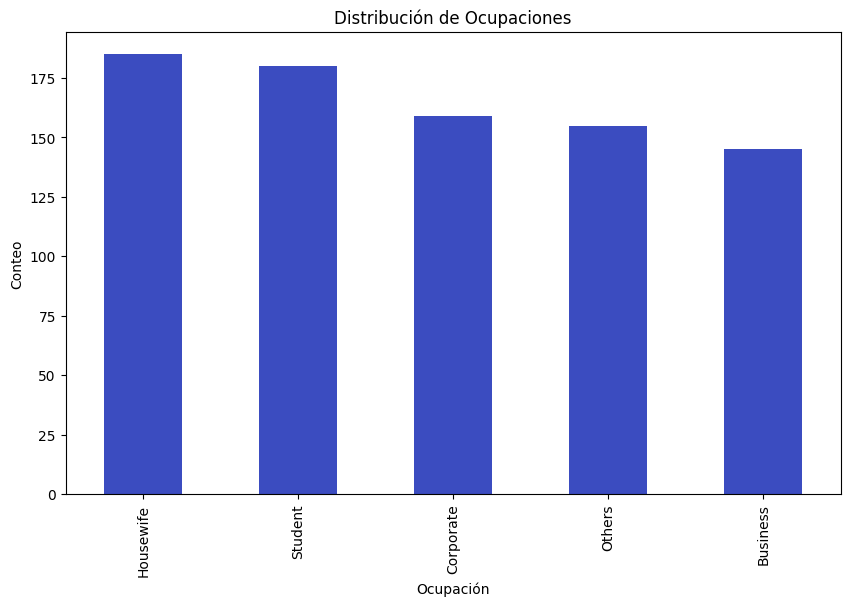

In [75]:
# Gráfico de barras apiladas para visualizar la ocupación
occupation_counts = df['Occupation'].value_counts()
plt.figure(figsize=(10, 6))
occupation_counts.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Distribución de Ocupaciones')
plt.xlabel('Ocupación')
plt.ylabel('Conteo')
plt.show()

Este gráfico de barras apiladas nos muestra la distribución de ocupaciones en nuestra muestra de datos.


*   Eje X (Horizontal):En la parte inferior del gráfico, encontramos las diferentes ocupaciones presentes en nuestro conjunto de datos.
*   Eje Y (Vertical): En el lado izquierdo del gráfico, representamos el conteo total de personas para cada ocupación. Cuanto más alto es el conjunto de barras, mayor es el número total de personas en esa ocupación.

Cada barra está dividida en secciones de diferentes colores, representando las ocupaciones individuales. La altura total de la barra es el conteo total para esa ocupación.
Observando las barras apiladas, podemos identificar rápidamente cuáles son las ocupaciones más comunes en nuestro conjunto de datos y cómo se distribuyen en relación con las demás

#Distribución de Estrés Creciente por Género y Edad

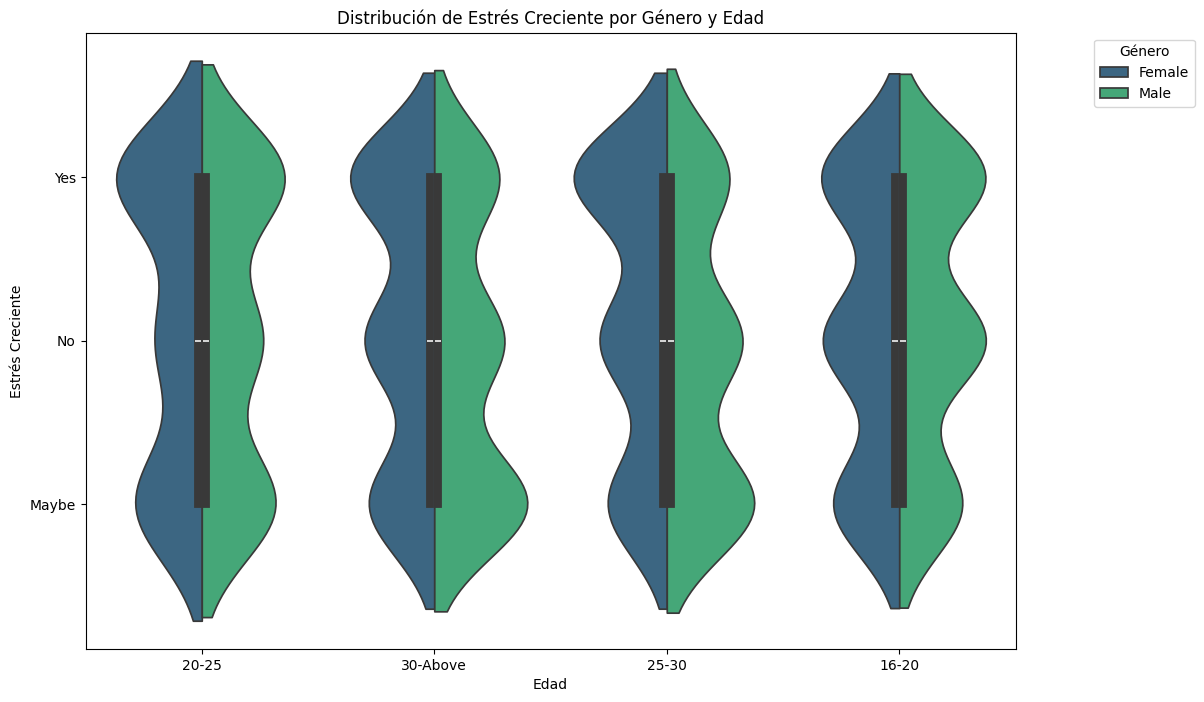

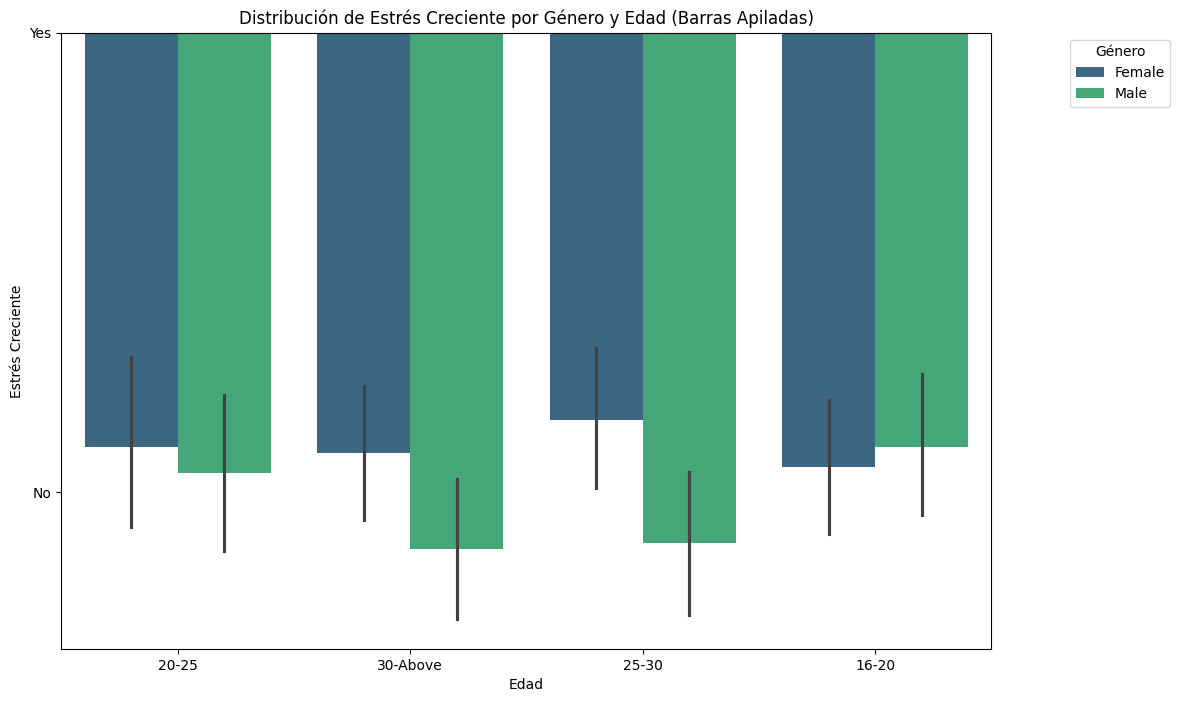

In [73]:

# Gráfico de violín para comparar la distribución de Estrés Creciente por género y edad
plt.figure(figsize=(12, 8))
sns.violinplot(x='Age', y='Growing_Stress', hue='Gender', data=df, palette='viridis', split=True)
plt.title('Distribución de Estrés Creciente por Género y Edad')
plt.xlabel('Edad')
plt.ylabel('Estrés Creciente')
plt.legend(title='Género', loc='upper right', bbox_to_anchor=(1.2, 1))

# Gráfico de barras apiladas para mostrar la distribución por género y edad
plt.figure(figsize=(12, 8))
sns.barplot(x='Age', y='Growing_Stress', hue='Gender', data=df, palette='viridis')
plt.title('Distribución de Estrés Creciente por Género y Edad (Barras Apiladas)')
plt.xlabel('Edad')
plt.ylabel('Estrés Creciente')
plt.legend(title='Género', loc='upper right', bbox_to_anchor=(1.2, 1))

plt.show()

Eje X (Horizontal): Representa las diferentes edades. Cada "violín" en el gráfico corresponde a un grupo de edad específico.

Eje Y (Vertical): Representa el nivel de Estrés Creciente. La altura de las áreas dentro de los violines indica la densidad de la distribución de estrés creciente para cada grupo de edad.

Violines: Cada "violín" muestra la distribución de Estrés Creciente para un grupo de edad en particular. La parte más ancha del violín indica una mayor densidad de observaciones, mientras que las partes más delgadas indican menor densidad.

Colores y Separación: Los violines están divididos en dos partes, una para cada género (hombre y mujer). Los colores representan el género, y la separación en el centro muestra la distribución relativa de estrés creciente para cada género en el mismo grupo de edad.

Leyenda: La leyenda en la esquina superior derecha indica qué color representa cada género.

Título y Etiquetas: El título del gráfico es "Distribución de Estrés Creciente por Género y Edad". Las etiquetas de los ejes indican qué está representando cada eje.

#Distribución de Cambios de Hábitos

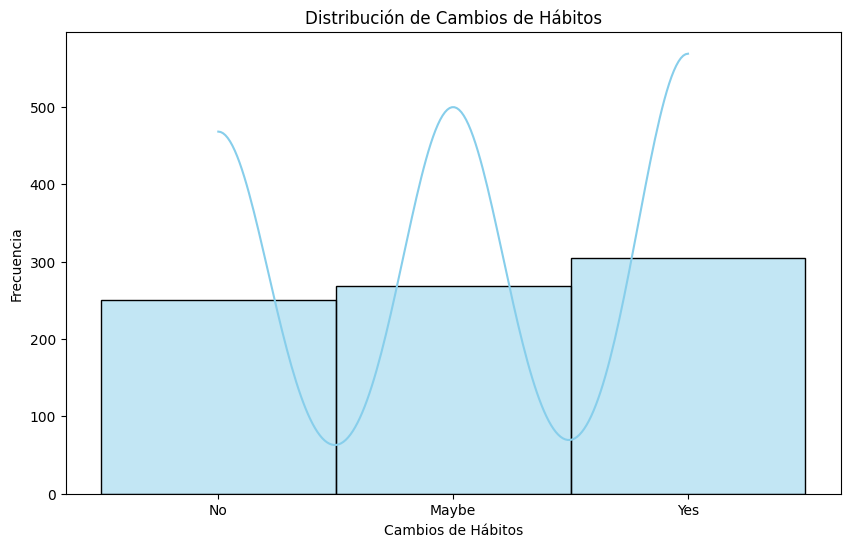

In [51]:
# Histograma para visualizar la distribución de Cambios de Hábitos
plt.figure(figsize=(10, 6))
sns.histplot(df['Changes_Habits'], bins=20, kde=True, color='skyblue')
plt.title('Distribución de Cambios de Hábitos')
plt.xlabel('Cambios de Hábitos')
plt.ylabel('Frecuencia')
plt.show()

Este gráfico es un histograma que representa la distribución de cambios de hábitos, con barras que muestran la frecuencia de diferentes rangos de cambios. La línea suave sobre el histograma (KDE) proporciona una estimación de la forma de la distribución

#Distribución de Cambios en el peso por Género

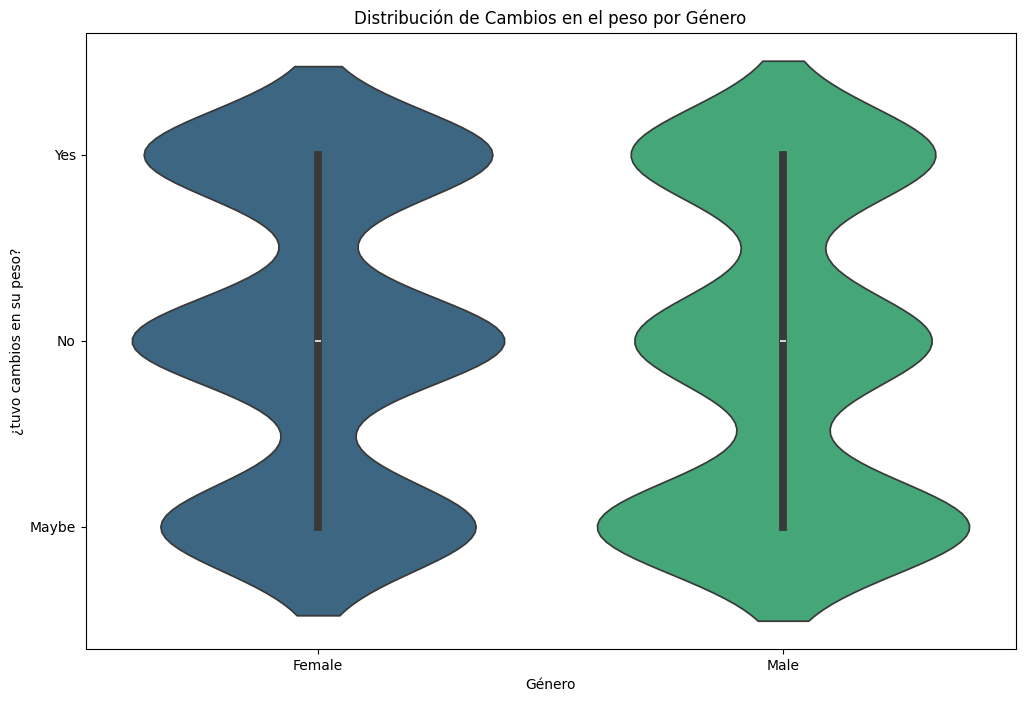

In [77]:
# Gráfico de violín para comparar la distribución de Weight Change por género
plt.figure(figsize=(12, 8))
sns.violinplot(x='Gender', y='Weight_Change', data=df, hue='Gender', palette='viridis', legend=False)
plt.title('Distribución de Cambios en el peso por Género')
plt.xlabel('Género')
plt.ylabel('¿tuvo cambios en su peso?')
plt.show()

Este gráfico de violín nos ayuda a entender cómo se distribuyen los cambios en el peso en función del género de las personas encuestadas.


*  
Eje X (Horizontal): En la parte inferior del gráfico, tenemos dos categorías de género: masculino y femenino.
*   Eje Y (Vertical):En el lado izquierdo del gráfico, representamos la distribución de los cambios en el peso. Cuanto más ancho sea el violín en una ubicación particular, más común es ese cambio de peso en ese género

Observamos la forma y el ancho de los violines para entender la variabilidad en los cambios de peso. Un violín más ancho indica que hay más personas que experimentaron ciertos cambios de peso en ese género.
Título del Gráfico:

Este gráfico proporciona una clara visualización de cómo se distribuyen los cambios en el peso en diferentes géneros, permitiendo identificar patrones y tendencias en la muestra de datos.

#Frecuencia de Cambios de Humor por Género

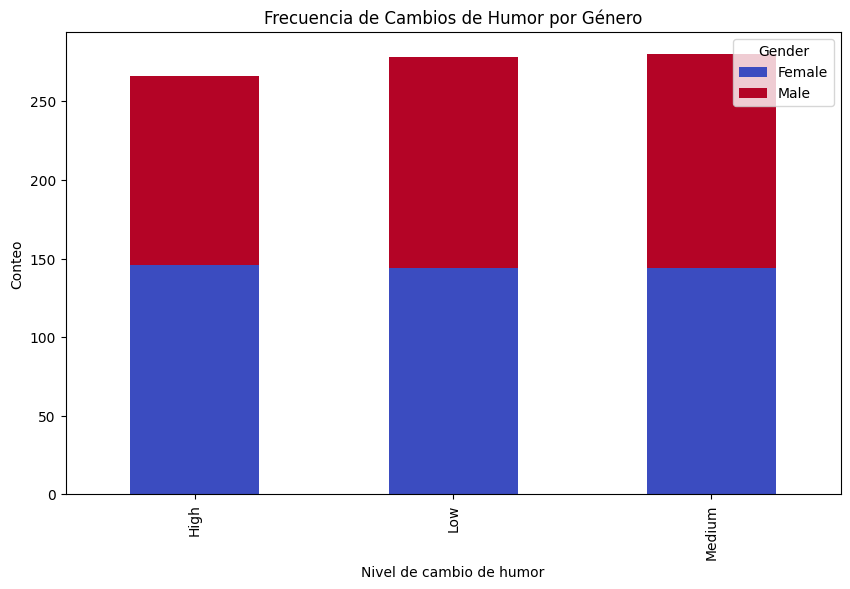

In [83]:
# Gráfico de barras apiladas para visualizar la frecuencia de Mood Swings según el género
mood_swings_gender = pd.crosstab(df['Mood_Swings'], df['Gender'])
mood_swings_gender.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(10, 6))
plt.title('Frecuencia de Cambios de Humor por Género')
plt.xlabel('Nivel de cambio de humor')
plt.ylabel('Conteo')
plt.show()

Este gráfico nos ayuda a explorar la relación entre los cambios de humor y el género de las personas encuestadas.

*   Eje X (Horizontal): En la parte inferior del gráfico, vemos diferentes niveles de cambio de humor.
*   Eje Y (Vertical): En el lado izquierdo del gráfico, mostramos el conteo total de personas para cada nivel de cambio de humor.

*   Colores de las Barras:Las barras están apiladas y coloreadas con tonos cálidos y fríos. Cada barra representa un nivel de cambio de humor, y la altura total de la barra muestra cuántas personas experimentan ese nivel de cambio de humor en particular.

Conclusión:
Este gráfico proporciona una visión rápida de cómo se distribuyen los diferentes niveles de cambios de humor en función del género. Predominando un nivel de Cambios de humor Medio en Ambos Géneros

#Distribución de Frustración en la Cuarentena por Edad (Orden Descendente)

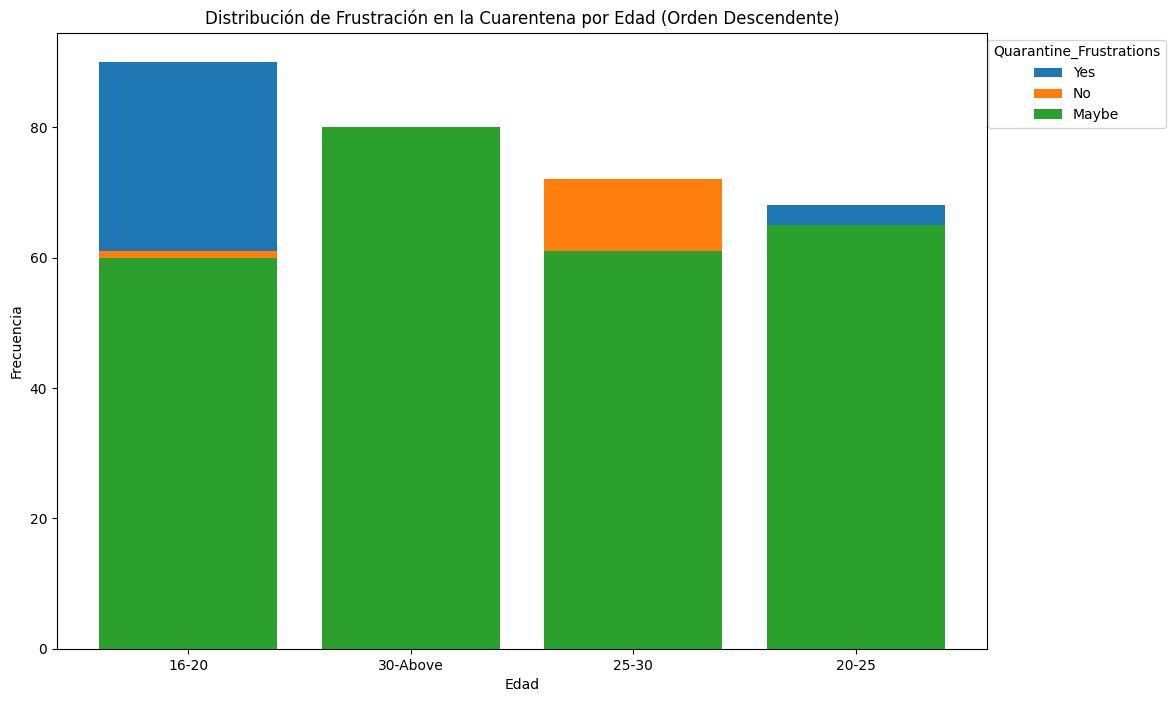

In [46]:
# Conteo de las categorías en Quarantine_Frustrations por edad
age_frustration_counts = df.groupby(['Age', 'Quarantine_Frustrations']).size().unstack()

# Obtener las categorías únicas en Quarantine_Frustrations
unique_categories = df['Quarantine_Frustrations'].unique()

# Ordenar las edades por la frecuencia de 'yes' de manera descendente
sorted_ages = age_frustration_counts[unique_categories[0]].sort_values(ascending=False).index

# Gráfico de barras ordenado por frecuencia descendente de 'yes'
plt.figure(figsize=(12, 8))

# Iterar sobre cada categoría y agregar una barra para cada edad (en el orden descendente)
for frustration_category in unique_categories:
    plt.bar(sorted_ages, age_frustration_counts.loc[sorted_ages, frustration_category], label=frustration_category)

plt.title('Distribución de Frustración en la Cuarentena por Edad (Orden Descendente)')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend(title='Quarantine_Frustrations', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


Este gráfico muestra cómo la frustración en la cuarentena varía según la edad de las personas encuestadas.




*   Eje X (Horizontal):En el eje horizontal (en la parte inferior del gráfico), tenemos las edades de las personas, ordenadas de mayor a menor según la frecuencia de aquellos que respondieron 'sí' a la pregunta sobre la frustración en la cuarentena.

*   Eje Y (Vertical):En el eje vertical (en el lado izquierdo del gráfico), representamos la frecuencia de respuestas en cada grupo de edad. Cuanto más alto es una barra, más personas de esa edad respondieron 'sí' a la pregunta.


Conclusiones: Observamos que en las edades más altas, hay una frecuencia más alta de respuestas 'sí', indicando que las personas mayores tienden a experimentar más frustración en la cuarentena en comparación con las edades más jóvenes. También podemos ver cómo las respuestas 'no' y 'maybe' se distribuyen en diferentes edades.